# Krypto 3

### Oppgave 1


*NB! Alle tallene er skrevet i base 10, ikke binært .... og 10 her er heller ikke
skrevet binært!!! La meg ikke måtte si det 10 ganger da...* **<-- Denne fikk en god latter fra meg x)**

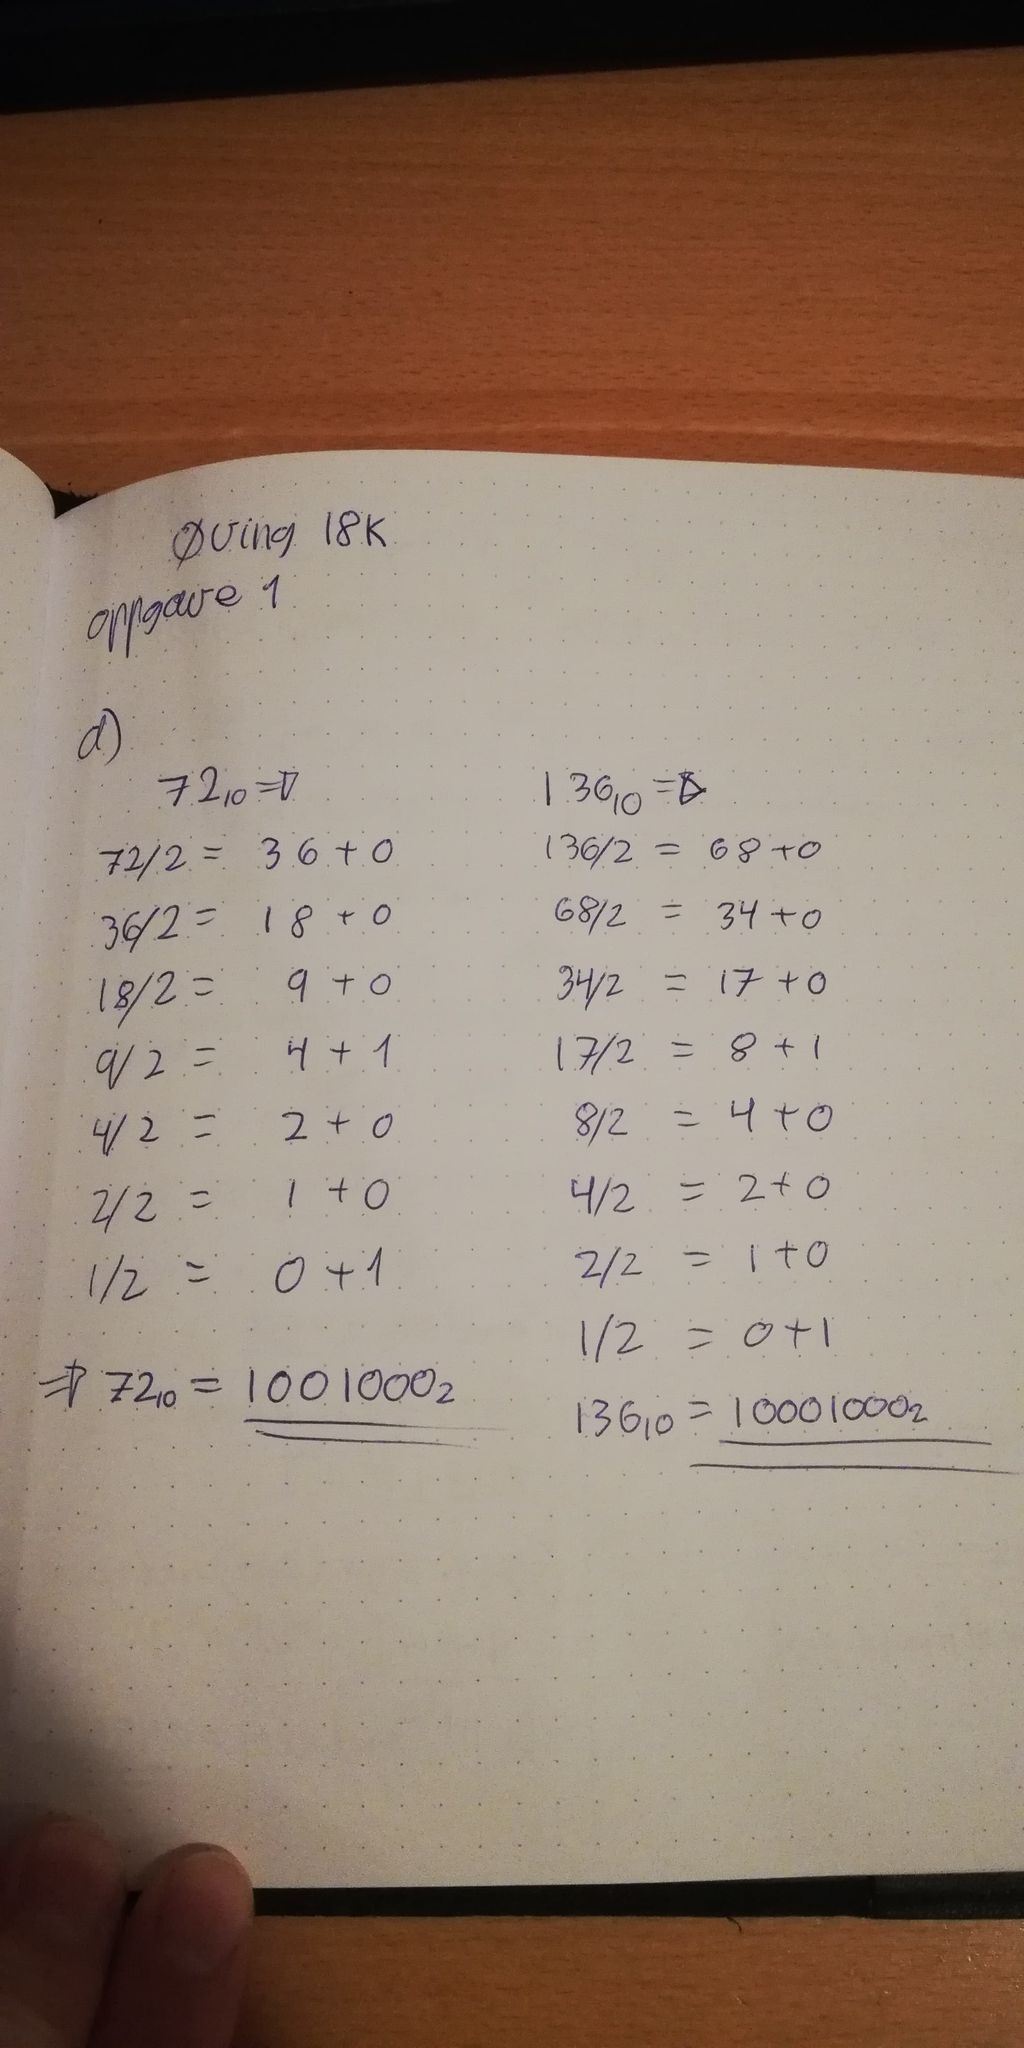

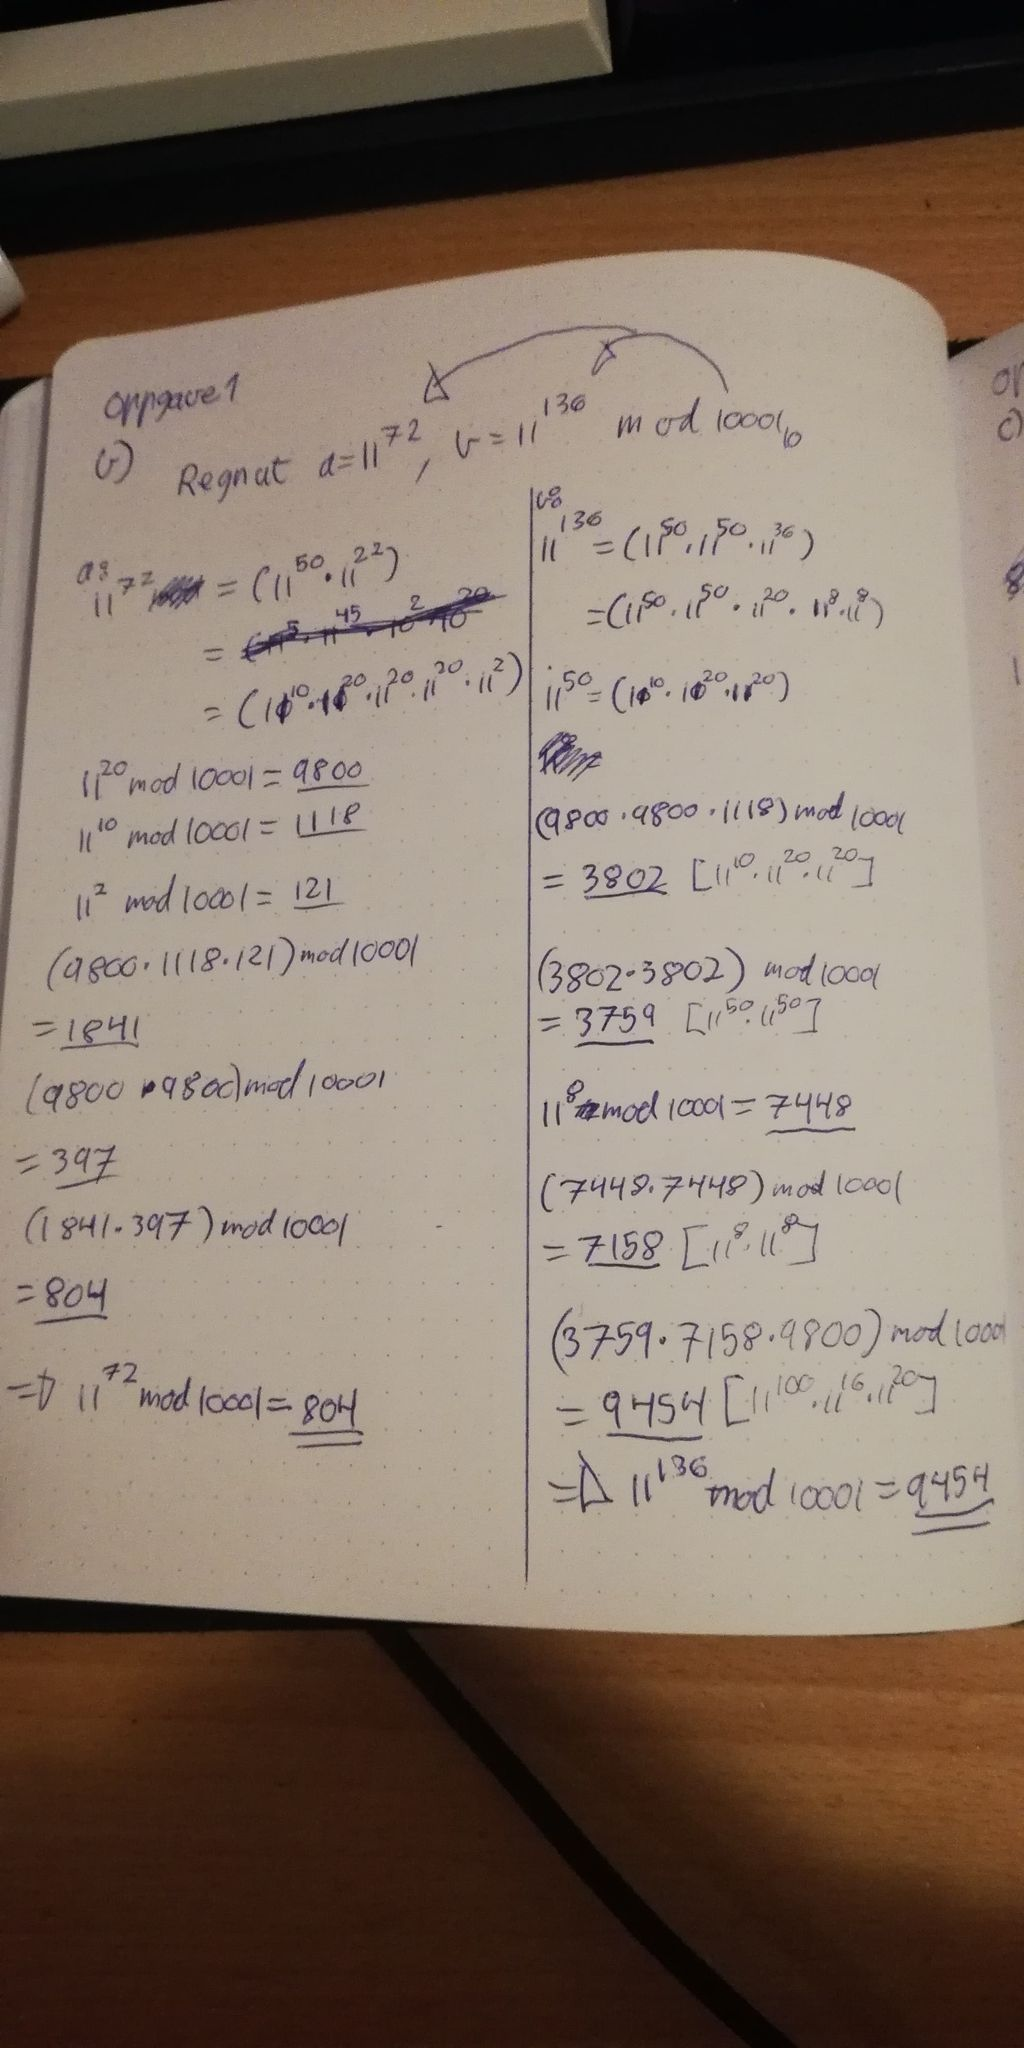

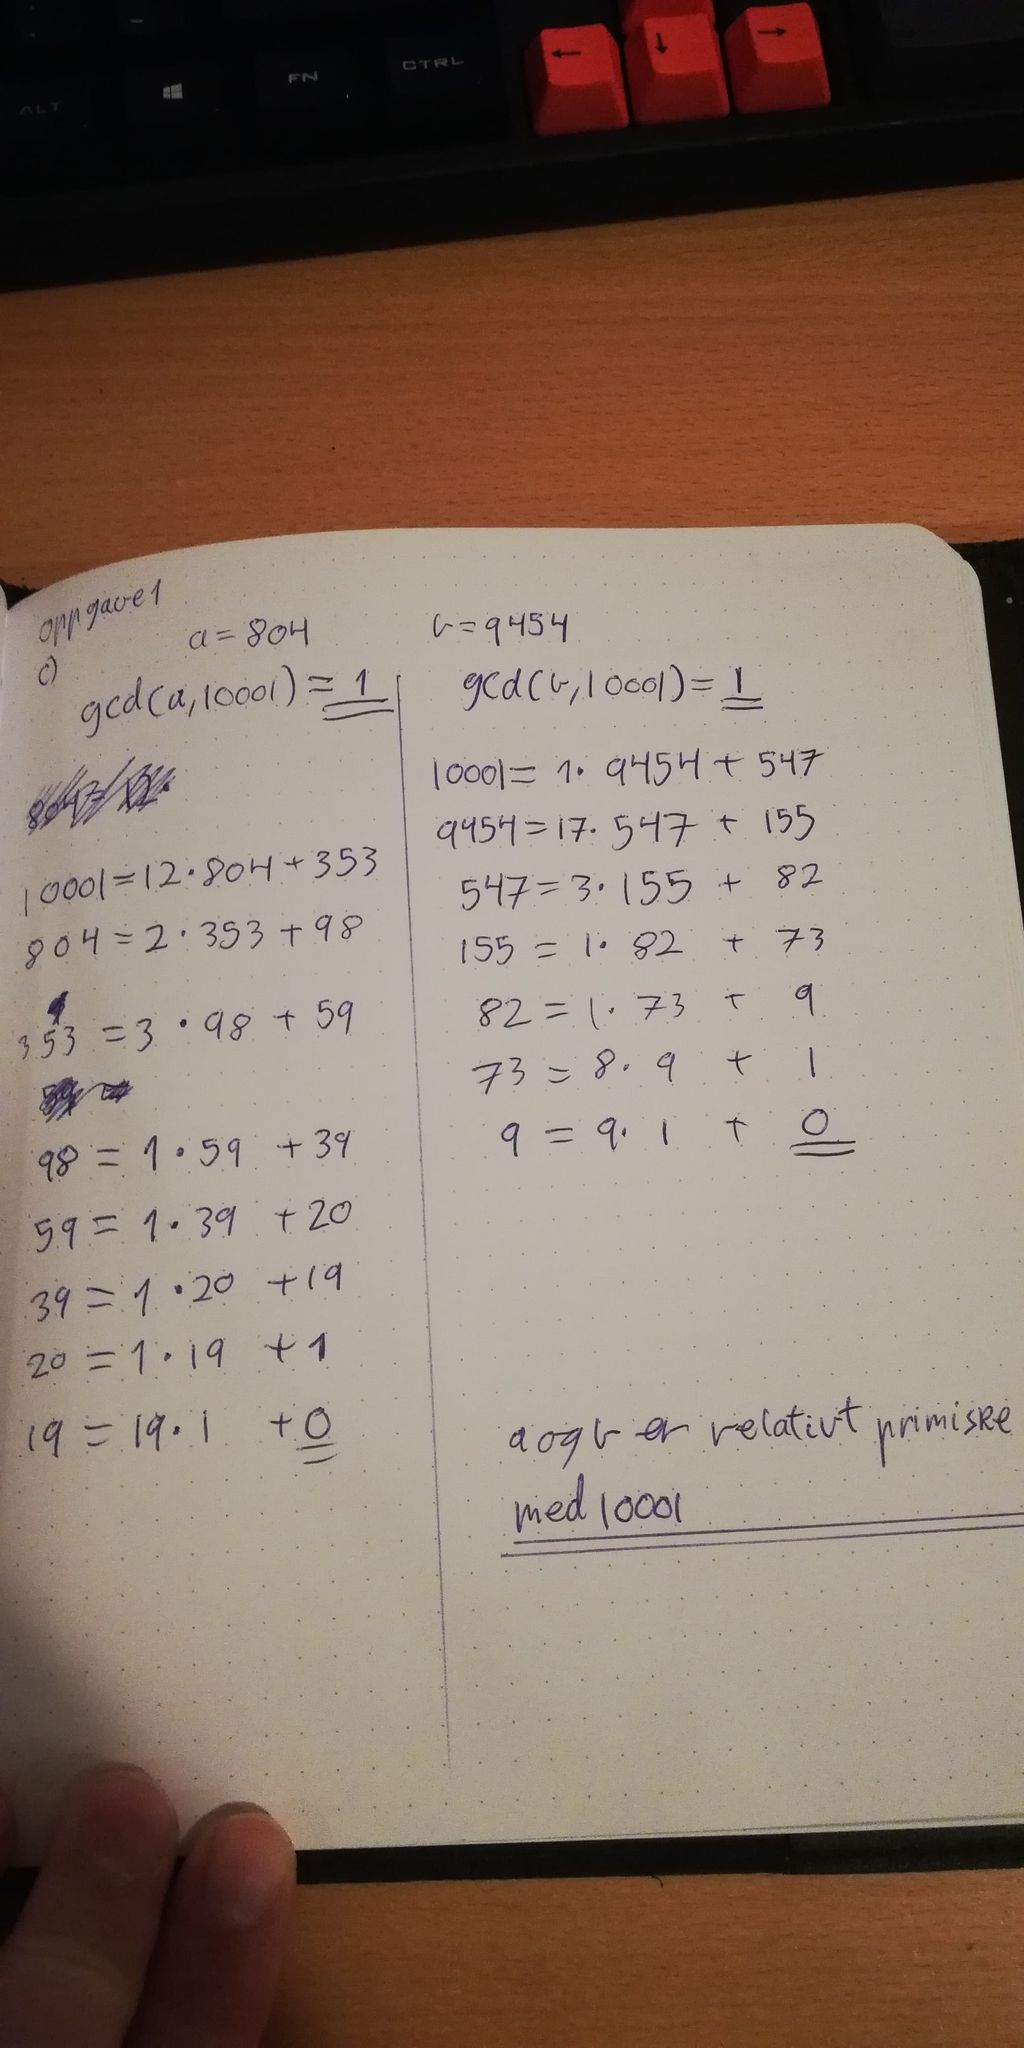

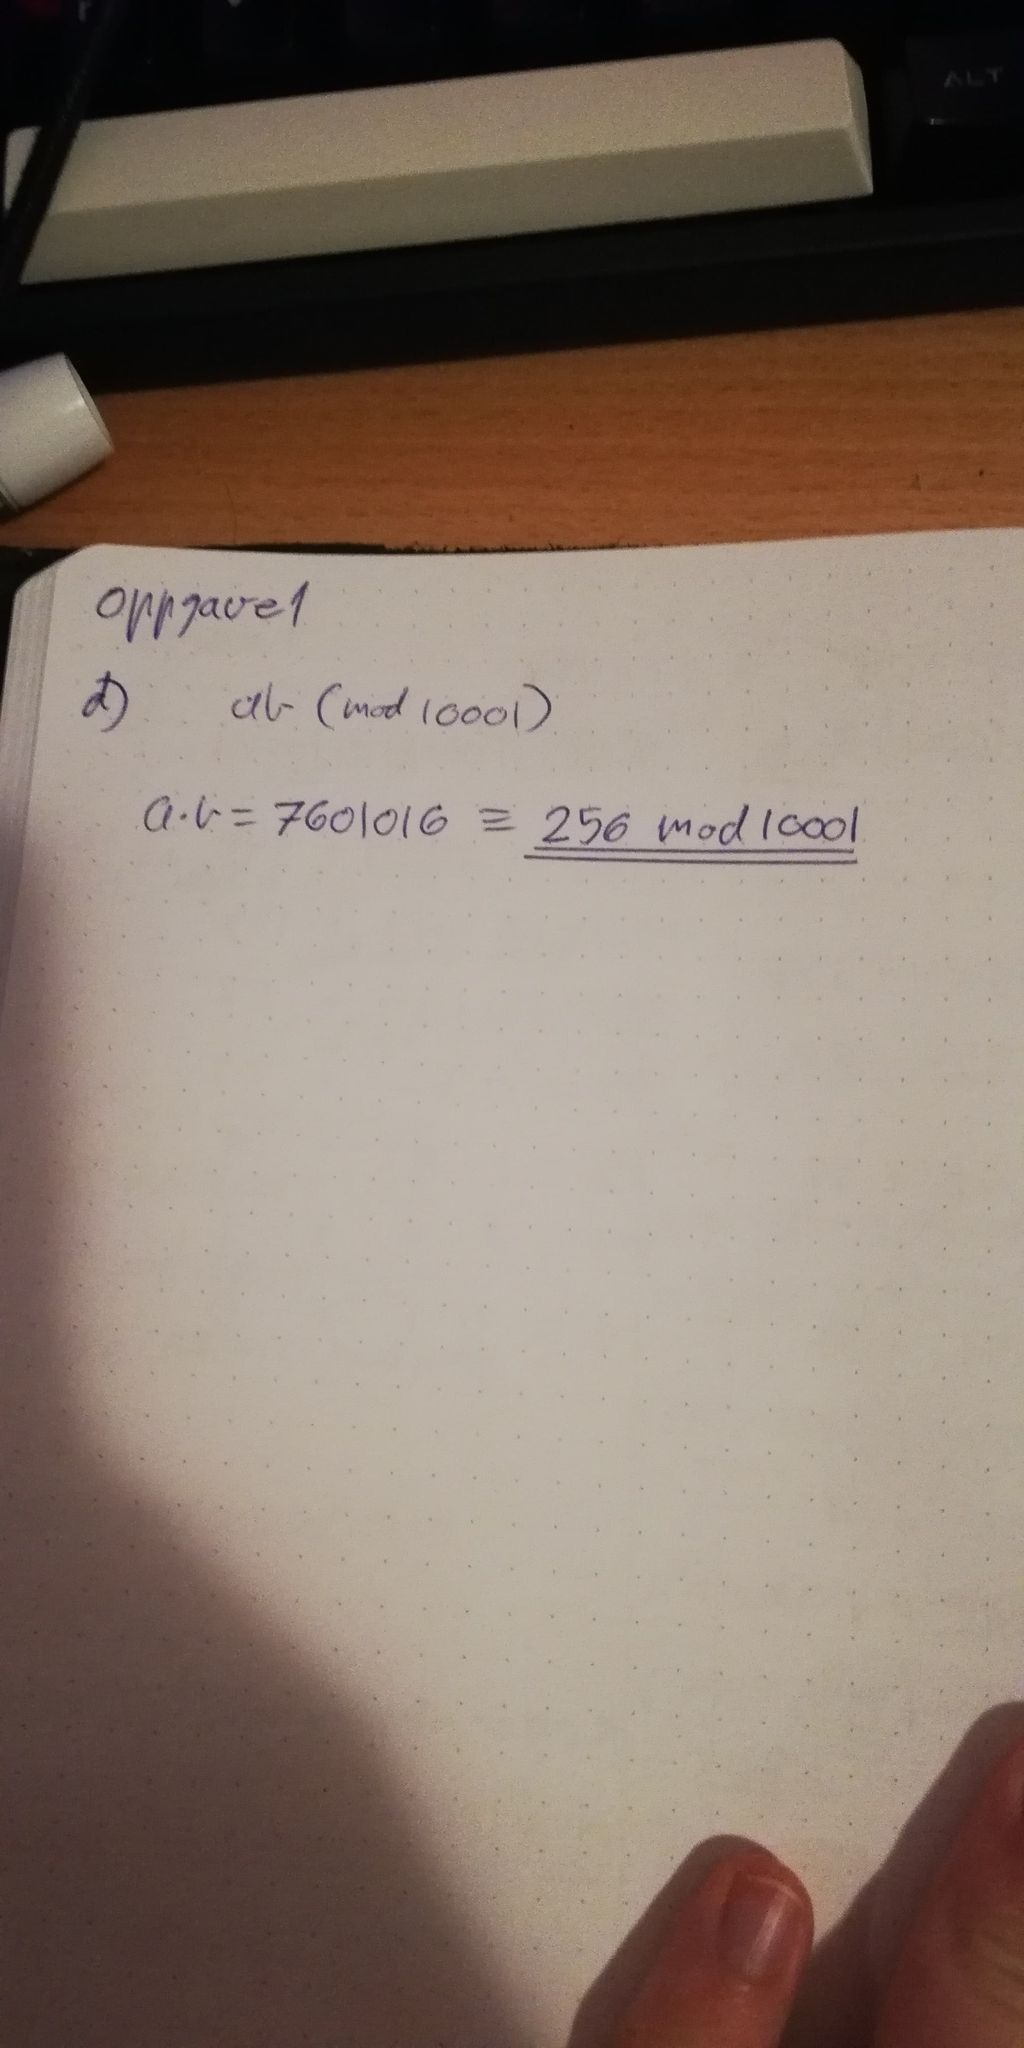

### Oppgave 2

Sett opp et RSA-kryptosystem med følgende parametre:

* p og q skal ha minst 8 bits hver.
* e skal være liten, men større enn 3

**a)** Skriv ut (hele) offentlig nøkkel

In [10]:
# RSA

p = 71
q = 113

n = p * q

ø = (p - 1)*(q - 1)
print(ø)

e = 11

public_key = (n, e)
print("Public key:")
print(public_key)

7840
Public key:
(8023, 11)


**b)** Finn ved Euklids algoritme d og skriv ut (hele) private nøkkel

In [11]:
import numpy as np

d = np.gcd(e, ø)

# finding d

d = 1

while ((d * e) % ø != 1):
    d = d+1

print("d found!")
print(d)

private_key = (p, q, d)
print("Private key:")
print(private_key)

d found!
2851
Private key:
(71, 113, 2851)


**c)** Krypter 42 og dekrypter igjen. Bruk kvadrer-og-multipliser-algoritmen
for å regne ut potenser

In [12]:
def encrypt_RSA(clear, public_key):
    
    return (clear ** public_key[1]) % public_key[0]
    
print(encrypt_RSA(42, public_key))

2300


In [13]:
def decrypt_RSA(encrypted, public_key, private_key):
    
    return (encrypted ** private_key[2]) % public_key[0]

print(decrypt_RSA(2300, public_key, private_key))

42


### Oppgave 3

**a)** La n = 1829 og B = 5. Kan du finne en primtallsfaktor i n ved Pollard
p − 1?

In [14]:
def pollardMinusOne(n, B):
    a = 2
    d = 0
    for i in range(2, B):
        a = (a ** i) % n
        d = np.gcd((a-1), n)
        
        if(d > 1 and d < n):
            return d
    
    return None

In [15]:
result = pollardMinusOne(1829, 5)

if (result is not None):
    print(result)
else:
    print("Fant ikke primtallsfaktor, prøv en større B")

Fant ikke primtallsfaktor, prøv en større B


**b)** La n_1 = 18779 og n_2 = 42583. Ved bruk av Pollard p − 1, finn B’er
som er garantert å fungere for hver av disse, uten å utføre testen. (Vi
må her bruke kjennskap til faktoriseringene av n1 og n2.)


In [16]:
import subprocess as sp

def factors(x):
    temp = str(sp.run(["factor", str(x)], capture_output=True).stdout.strip()).split(' ')[1:]
    for ix, s in enumerate(temp):
        temp[ix] = int(s.replace('\'', ''))
    return temp

def largestQ(l=[]):
    largest = 0
    s = set(sorted(l))
    for i in s:
        t = i ** l.count(i)
        largest = max(t, largest)
    return largest

In [19]:
n_1 = 18779
n_2 = 42583

n_1_factors = factors(n_1)
n_2_factors = factors(n_2)

Q = []
for n in n_1_factors:
    nf = factors(n - 1)
    Q.append(largestQ(nf))
Q = min(*Q)

print("n_1")
print('n = %i' % n_1, 'B = %i' % Q)

Q = []
for n in n_2_factors:
    nf = factors(n - 1)
    Q.append(largestQ(nf))
Q = min(*Q)

print("n_2")
print('n = %i' % n_2, 'B = %i' % Q)

n_1
n = 18779 B = 7
n_2
n = 42583 B = 32


**c)** La n = 6319. Forsøk å finne en faktor i dette tallet ved Pollard p − 1.
Prøv deg frem med B.

In [18]:
n = 2

while(True):
    result = pollardMinusOne(1829, n)

    if (result is not None):
        print(result)
        break
    else:
        n = n + 1

31


### Oppgave 4

Finn en faktor i tallene under med f(x) = x^2 + 1 og startverdi x_1 = 1 i Pollard rho. Hvor mange iterasjoner trenger du?

**a)** 851

In [23]:
def pollards_rho(n):
    x = 1; y = x; d = 1
    
    i = 0
    
    f = lambda x: (x**2 + 1) % n
    
    
    while d == 1:
        
        x = f(x); y = f(f(y))
        
        d = np.gcd(abs(x-y), n)
        
        i = i + 1
        
    if d != n:
        return (d, i)

In [26]:
result = pollards_rho(851)
print("Itterasjoner for n = 851")
print(result[1])
print("Primtallsfaktor:")
print(result[0])

Itterasjoner for n = 851
4
Primtallsfaktor:
37


**b)** 1517

In [27]:
result = pollards_rho(1517)
print("Itterasjoner for n = 1517")
print(result[1])
print("Primtallsfaktor:")
print(result[0])

Itterasjoner for n = 1517
4
Primtallsfaktor:
37


**c)** 31861

In [28]:
result = pollards_rho(31861)
print("Itterasjoner for n = 31861:")
print(result[1])
print("Primtallsfaktor:")
print(result[0])

Itterasjoner for n = 31861:
5
Primtallsfaktor:
151


### Oppgave 5

**a)** Vis følgende multiplikative egenskap til RSA:

\begin{align}
e_K(x_1)e_K(x_2)\ mod\ n = e_K(x_1x_2)\ mod\ n
\end{align}

Noen regler:

\begin{align}
e_K(x) = x^e\ mod\ n \\
(a\ mod\ n)(b\ mod\ n) = ab\ mod\ n \\
a^i b^i = (ab)^i
\end{align}

Ved å bruke disse, kan vi gjøre:
    
\begin{align}
e_K(x_1)e_K(x_2)\ mod\ n = (x_1)^e (x_2)^e\ mod\ n \\
= (x_1 x_2)^e\ mod\ n \\
= e_K(x_1 x_2)\ mod\ n
\end{align}

**b)** Vis hvordan RSA er usikker motvalgt chiffertekst-angrep: Gitt en chiffertekst y, beskriv hvordan en angriper kan velge chiffertekst y\` =/= y, slik at kjennskap til klarteksten x\` = d_K(y\`) lar ham beregne x = d_K(y)

Vi har en chiffertekst *y*

\begin{align}
y = x^e\ mod\ n\\
y' = 2^e mod\ n\\
\end{align}

Send en spesifikk melding *y''* til offeret.

\begin{align}
y'' = y' * y = y * 2^e = x^e * 2^e\ mod\ n \\
\end{align}

Om vi nå dekrypterer *y''*:

\begin{align}
(y'')^d = (x^e 2^e)^d\ mod\ n \\
= x * 2\ mod\ n
\end{align}

Alt vi trenger å gjøre for å finn x er å dele på 2.

### Oppgave 6

**a)** Forklar hvorfor vi kan skrive *q−p = 2d*, hvor *d* er et heltall (dvs. at *q−p* er et partall. Det er ikke noe spesielt med *d*.)

*(q - p)* er et partall. *d* i dette tilfellet er et oddetall pga. egenskapen oddetall har: et oddetall * 2 vil alltid være ett partall. 

**b)** Vis at *n+d^2* er et kvadrattall

Vi vet at (*k^2* er kvadrattall):

\begin{align}
n = p * q \\
q-p = 2d => d = (q-p)/2
k^2 = k * k
\end{align}

Dermed:

\begin{align}
n + d^2 = pq + ((q - p) / 2)^2 \\
= pq + (p^2 - 2pq + q^2)/4 \\
= (4pq)/4 + (p^2 - 2pq + q^2)/4 \\
= (p^2 + 2pq + q^2)/4 \\
= ((p + q) / 2)^2 \\
= k^2 =>\\
k = (p+q) / 2\ \square
\end{align}

**c)** Vis hvordan vi kan faktorisere *n* hvis *n+d^2* er et kvadrattall. Vi antar her at at *d^2* er “liten nok”.

Faktorisering

Vi vet at:

\begin{align}
n + d^2 = k^2 = (\frac{p+q}{2})^2 \\
=> \\
n = k^2 - d^2 = (k + d)(k - d) = qp \\
q = k + d\  \wedge\ p = k - d
\end{align}

**d)** Faktoriser n = 152416580095517 med denne metoden.

Vi kan regne ut *d* og *n* med en brute force på denne måten:

Vi vet at:

\begin{align}
n + d^2 = k^2\\
=> \\
k = \sqrt{n + d^2}
\end{align}

*K* er et kvadrattall (alle kvadrattall er heltall)
*d* er "liten nok"

Dette lar oss finne d ved å itterere opp i fra 1, til vi finner den riktige verdien for *d*.
Vi vet at vi har funnet riktig *d* når resultatet av formelen for *K* blir ett heltall.

\begin{align}
n = 152416580095517\\
d = 1 : \sqrt{n + d^2} = 12345710,999999878500314805683741\\
d = 2 : \sqrt{n + d^2} = 12345711\\
=>\\
d = 2 \wedge k = 12345711
\end{align}

Faktorisering:
\begin{align}
q = k + d\  \wedge\ p = k - d\\
q = 12345711 + 2 \wedge p = 12345711 - 2\\
q = 12345713 \wedge p = 12345709\\
\end{align}